# Descrição do conjunto de dados

In [31]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

boston_features = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", 
    "PTRATIO", "B", "LSTAT"
]

X = pd.DataFrame(boston_features, columns=columns)
y = pd.Series(target)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


O conjunto de dados Boston é composto por 14 colunas, com 506 entradas cada. 13 das colunas são features e 1 é de rótulos,
portanto a heurística utilizada nesse problema será o aprendizado supervisionado. Os features são:
* CRIM – Taxa de criminalidade per capita na cidade.
* ZN – Proporção de terrenos residenciais zonados para lotes com mais de 25.000 pés quadrados.
* INDUS – Proporção de acres de terreno não comercial, industrial, por cidade.
* CHAS – Variável binária (0 ou 1), onde 1 indica que o imóvel está situado à beira do rio Charles e 0 indica que não está.
* NOX – Concentração de óxidos de nitrogênio (uma medida da poluição do ar) por 10 milhões de partes.
* RM – Número médio de quartos por residência.
* AGE – Proporção de casas ocupadas por seus proprietários que foram construídas antes de 1940.
* DIS – Distância ponderada até os cinco centros de emprego de Boston.
* RAD – Índice de acessibilidade a rodovias radiais.
* TAX – Taxa de imposto sobre a propriedade por US$ 10.000.
* PTRATIO – Razão de alunos por professor em escolas.
* B – Variável calculada como B=1000×(Bk−0.63)2B=1000×(Bk−0.63)2, onde BkBk é a proporção de pessoas de ascendência negra na área.
* LSTAT – Percentual da população com status socioeconômico mais baixo (low status).
  
E o alvo é:
* MEDV – Valor médio das casas ocupadas pelos proprietários em milhares de dólares.

O conjunto apresenta nenhum dado faltante, o que significa que nenhuma inputação de dados será necessária.
Além disso, todos os dados são númericos, ou seja, não precisaremos lidar com colunas categóricas.

# Separação do conjunto em treino e teste

A seguinte separação do conjunto no scikit-learn é aleatória, e deixa 20% dos dados para teste:

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualização do conjunto de dados

Para ter alguma noção dos dados que estamos tratando, veremos alguns indicadores estatísticos.
Para evitar o snooping bias, vamos usar o conjunto de treino na nossa visualização.

In [33]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


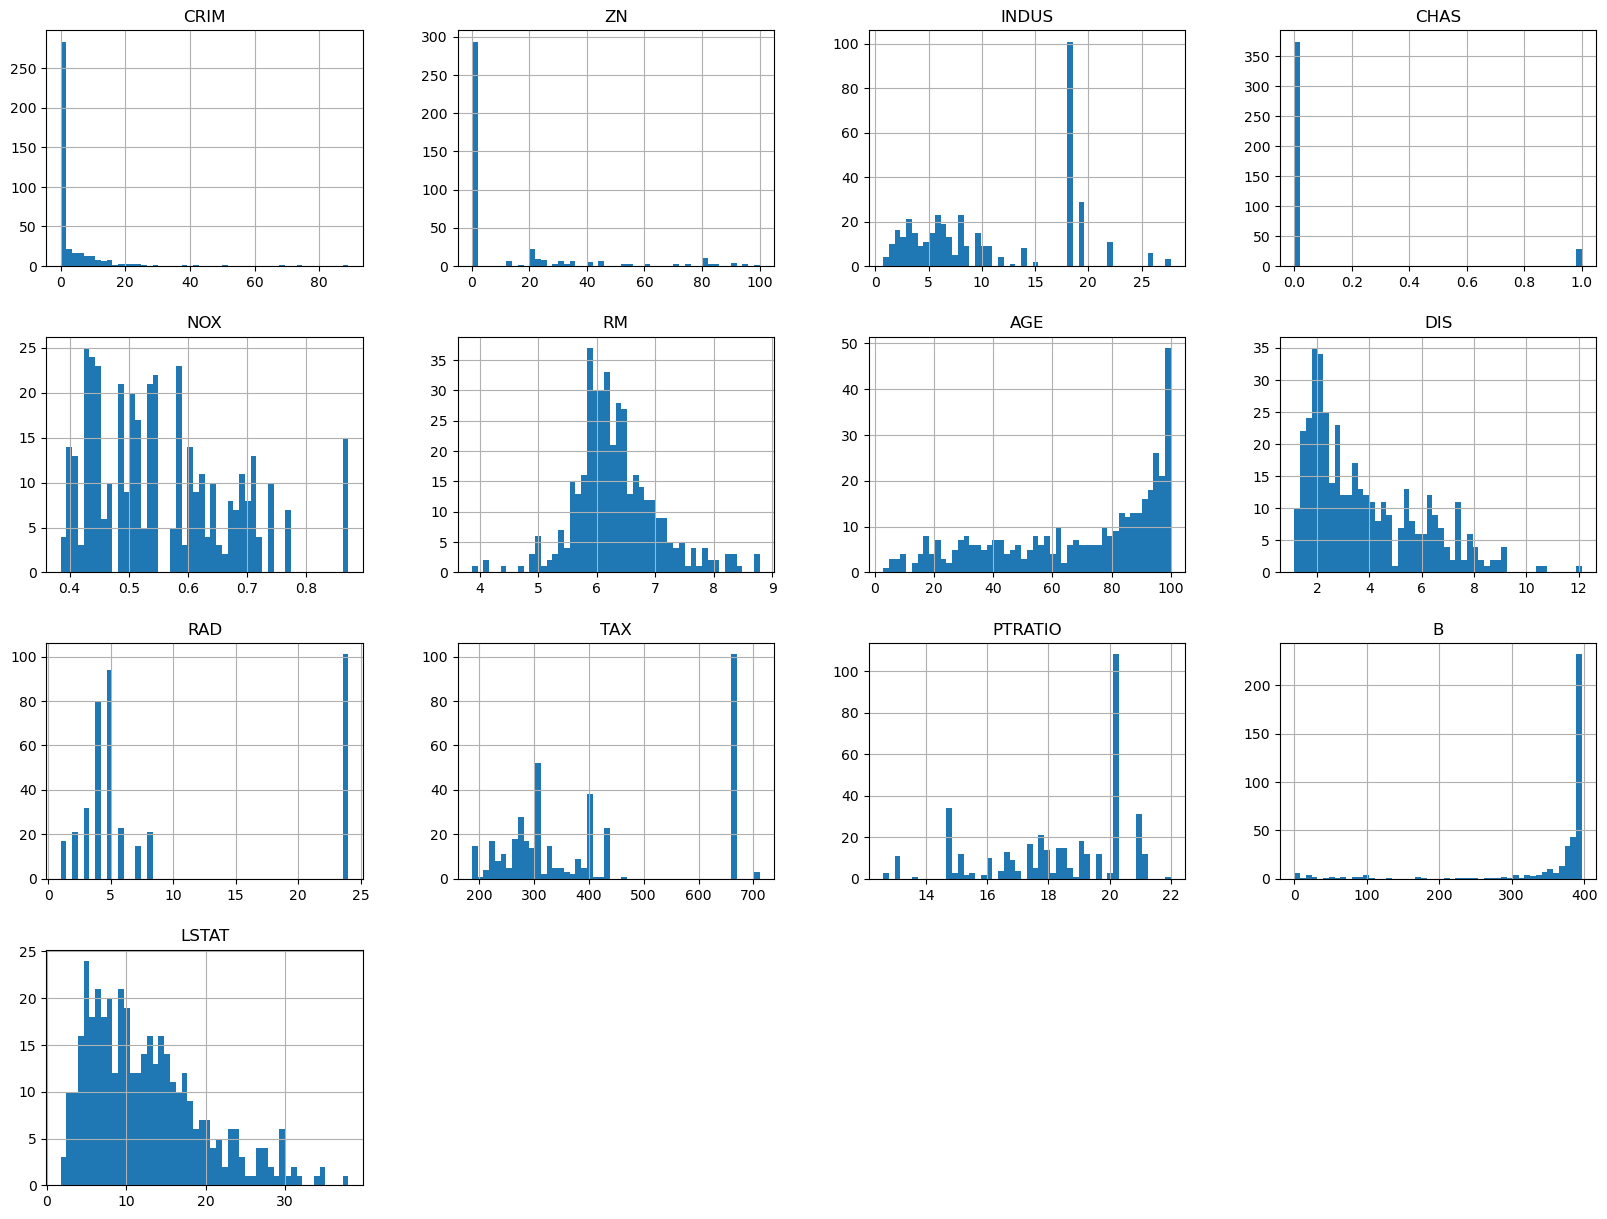

In [34]:
import matplotlib.pyplot as plt
X_train.hist(bins=50, figsize=(20,15))
plt.show()

Podemos observar que diversas colunas contam com outliers, portanto podemos descartar modelos 
sensíveis à outliers da nossa análise, como regressão linear e SVMs, e usaremos então random forest,
decision tree e kNN.

# Preparação do conjunto de dados

Como observado anteriormente, o conjunto de dados não possui dados faltantes ou colunas categóricas,
então não há necessidade de mais processamento.

# Comparar modelos

Agora vamos testar os três modelos que discutimos anteriormente. Usaremos o erro médio quadrático pela quantidade de outliers e por penalizar grandes erros.

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
boston_predictions = tree_reg.predict(X_train)
tree_mse = MSE(y_train, boston_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [36]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
boston_predictions = forest_reg.predict(X_train)
forest_mse = MSE(y_train, boston_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.4065534125923715

In [37]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
boston_predictions = knn_reg.predict(X_train)
knn_mse = MSE(y_train, boston_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

5.240125083534658

Podemos descartar o kNN pois teve o maior erro. Note que o erro do Decision Tree é zero. Isso provavelmente indica um sobreajuste, mas vale a pena fazer um teste:

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [39]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [3.83017544 4.26626014 4.55642136 7.27196421 6.99937497 4.05601405
 5.04519573 5.48807799 3.16879315 5.4051827 ]
Mean: 5.008745974092166
Standard deviation: 1.2613899558320825


In [40]:
scores = cross_val_score(forest_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [3.2099176  3.42852189 2.87763584 5.49271695 4.75047017 2.9077104
 3.82573249 2.73916856 2.52786081 4.80381387]
Mean: 3.6563548567445325
Standard deviation: 0.9719815029667171


Então de fato o decision tree teve um sobreajuste. Agora vamos fazer um grid search no random forest para encontrar os melhores hiperparâmetros:

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 5, 7, 9], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                           23, 25, 27, 29]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 5, 7, 9]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Finalmente, utilizamos o conjunto de teste para fazer a predição de erro final:

In [42]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = MSE(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.8018876190332613

Vamos analisar se trata de um erro bom:

In [43]:
y_train.describe()

count    404.000000
mean      22.796535
std        9.332147
min        5.000000
25%       16.950000
50%       21.600000
75%       26.400000
max       50.000000
dtype: float64